In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [62]:
n_subj = 8
n_rois = 10

In [4]:
hitCR = np.load("results/acc_hitVsCR.npy")
hitMissVsCRFA = np.load("results/acc_hitMissVsCRFA.npy")
hitFAVsCRMiss = np.load("results/acc_hitFAVsCRMiss.npy")

In [42]:
hitCR_mean = np.nanmean(hitCR,axis=2)*100
print(np.std(hitCR_mean,axis=0))
hitMissVsCRFA_mean = np.nanmean(hitMissVsCRFA,axis=2)*100
hitFAVsCRMiss_mean = np.nanmean(hitFAVsCRMiss,axis=2)*100


[3.36095807 3.37784341 3.13998773 2.94741387 2.88895196 1.38174623
 2.54495173 2.82127911 3.63193713 2.27128613]


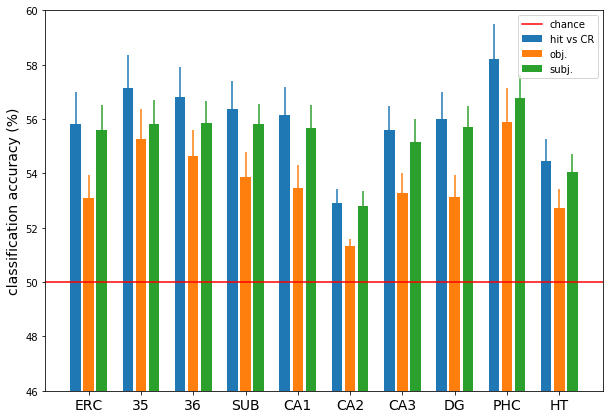

In [43]:
# plot classification accuracy for the 10 ROIs

fig,axs = plt.subplots(figsize=(10,7))

axs.bar(np.arange(0,10)*4+1,np.mean(np.nanmean(hitCR,axis=2),axis=0)*100)
axs.bar(np.arange(0,10)*4+2,np.mean(np.nanmean(hitMissVsCRFA,axis=2),axis=0)*100)
axs.bar(np.arange(0,10)*4+3,np.mean(np.nanmean(hitFAVsCRMiss,axis=2),axis=0)*100)

axs.errorbar(np.arange(0,10)*4+1,np.mean(np.nanmean(hitCR,axis=2),axis=0)*100,np.std(hitCR_mean,axis=0)/np.sqrt(n_subj),linestyle='')
axs.errorbar(np.arange(0,10)*4+2,np.mean(np.nanmean(hitMissVsCRFA,axis=2),axis=0)*100,np.std(hitMissVsCRFA_mean,axis=0)/np.sqrt(n_subj),linestyle='')
axs.errorbar(np.arange(0,10)*4+3,np.mean(np.nanmean(hitFAVsCRMiss,axis=2),axis=0)*100,np.std(hitFAVsCRMiss_mean,axis=0)/np.sqrt(n_subj),linestyle='')

axs.set_ylabel('classification accuracy (%)',fontsize=14)
axs.set_xticks(np.arange(0,10)*4+2)
axs.set_xticklabels(['ERC','35','36','SUB','CA1','CA2','CA3','DG','PHC','HT'],fontsize=14)
axs.set_ylim([46,60])
plt.axhline(y = 50, color = 'r', linestyle = '-')
axs.legend(['chance','hit vs CR','obj.','subj.'])

# individual data points?

In [45]:
acc_4way = np.load("results/acc_4way.npy")
yActual_4way = np.load("results/y_actual_4way.npy")
yPredicted_4way = np.load("results/y_predicted_4way.npy")


In [46]:
acc_4way_mean = np.nanmean(acc_4way,axis=2)*100


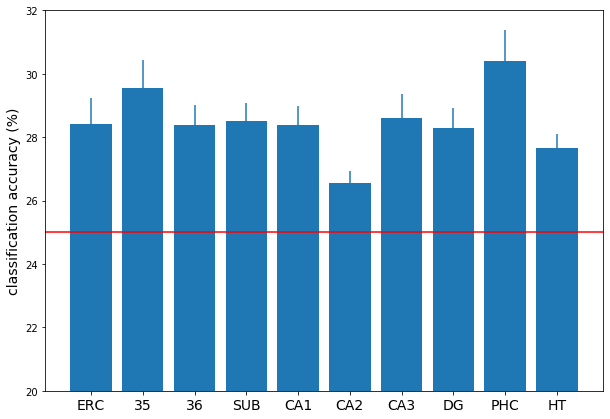

In [52]:
fig,axs = plt.subplots(figsize=(10,7))

axs.bar(np.arange(0,10)+1,np.mean(np.nanmean(acc_4way,axis=2),axis=0)*100)

axs.errorbar(np.arange(0,10)+1,np.mean(np.nanmean(acc_4way,axis=2),axis=0)*100,np.std(acc_4way_mean,axis=0)/np.sqrt(n_subj),linestyle='')

axs.set_ylabel('classification accuracy (%)',fontsize=14)
axs.set_xticks(np.arange(0,10)+1)
axs.set_xticklabels(['ERC','35','36','SUB','CA1','CA2','CA3','DG','PHC','HT'],fontsize=14)
axs.set_ylim([20,32])
plt.axhline(y = 25, color = 'r', linestyle = '-')


In [56]:
confMatrices = np.load("results/confMatrices_4way.npy")


In [59]:
confMatrices_mean = np.mean(confMatrices,axis=0)

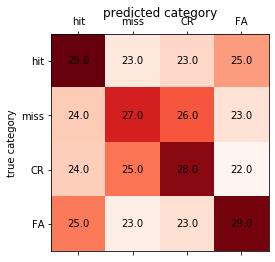

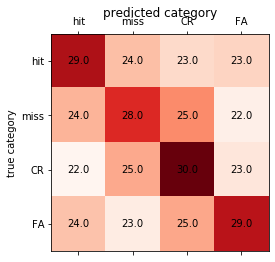

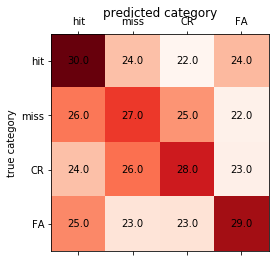

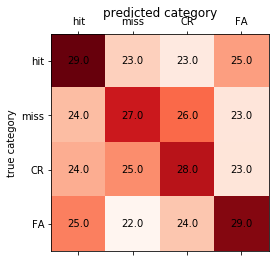

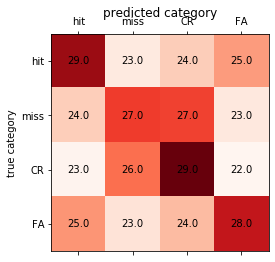

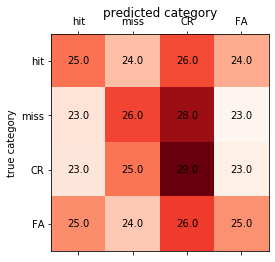

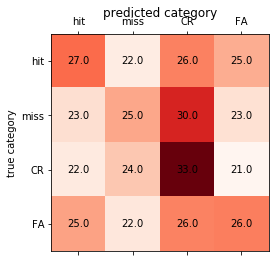

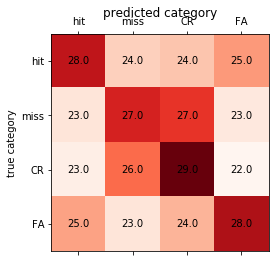

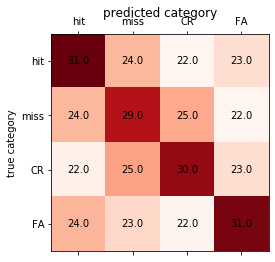

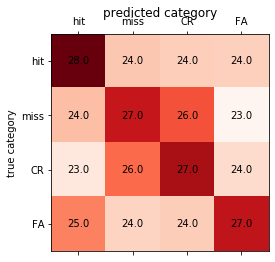

In [64]:
for iroi in range(n_rois):
    
    fig,axs= plt.subplots()
    pos = axs.matshow(confMatrices_mean[iroi], cmap=plt.cm.Reds)
    plt.title('predicted category')
    axs.set_ylabel('true category')
    axs.set_xticklabels(['','hit','miss','CR','FA'])
    axs.set_yticklabels(['','hit','miss','CR','FA'])
    
    for i in range(4):
        for j in range(4):
            c = np.round(confMatrices_mean[iroi,i,j])
            axs.text(j,i,str(c),va='center',ha='center')